In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
# Separate target variable from features
#y_train = train_data['MedHouseVal']
#X_train = train_data.drop(['MedHouseVal', 'id'], axis=1)


#X = blood[:,[0,1]]
#y = blood

# Split the dataset into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameters for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test set: ", accuracy)

Accuracy on the test set:  0.8333333333333334


In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Get predictions
    ab = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(ab)

    # Reshape predictions for contour plot
    cc = pred.reshape(xx.shape)

    ax.contourf(xx, yy, cc, cmap='viridis', alpha=0.2)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

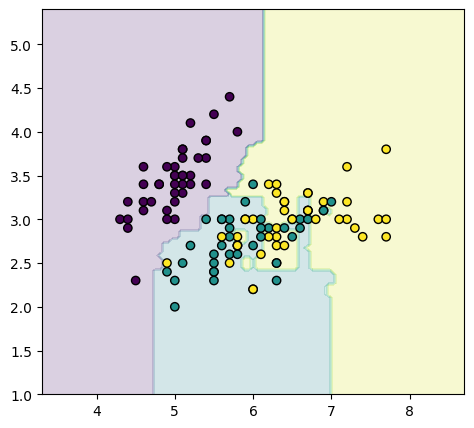

In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(best_model, X_train, y_train, ax1)

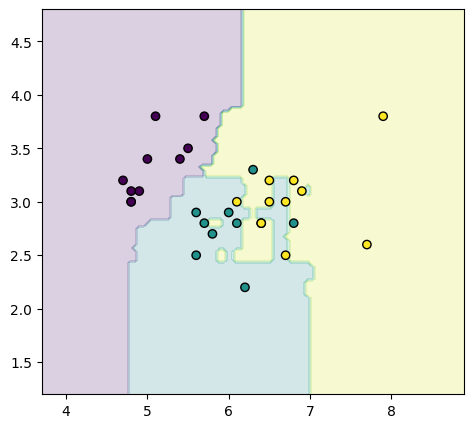

In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(best_model, X_test, y_test, ax1)